In [1]:
import numpy as np

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

from impdar import *

In [4]:
scg_mat_file = '../data/data03_LINE04_pick.mat'

scg_image_file = '../images/data03_LINE04_pick.png'

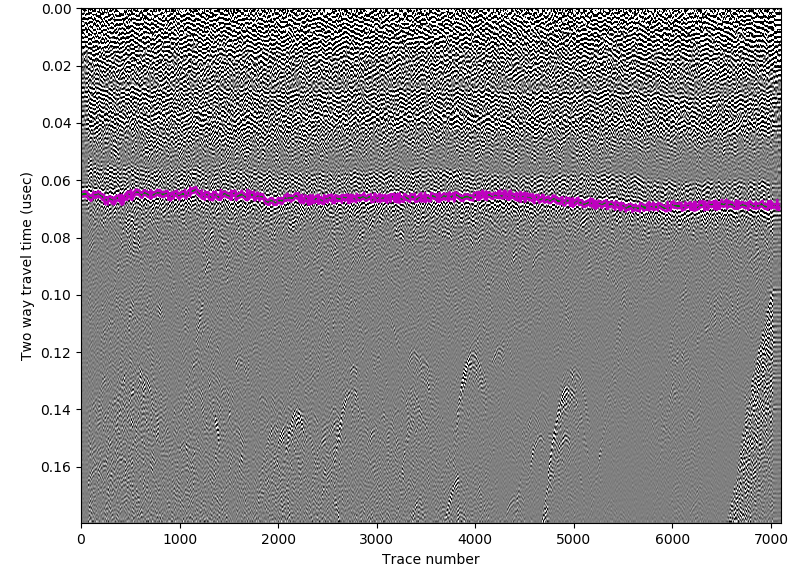

In [5]:
Image(scg_image_file)

In [6]:
dat = load.load('mat', scg_mat_file)[0]

In [7]:
dat.picks

In [8]:
dat.picks.power[0]

array([nan, nan, nan, ..., nan, nan, nan])

In [9]:
dat.picks.picknums[0]

1

Here is the current code for the `plot_power()` method in ImpDAR:

````python
def plot_power(dat, idx):
    try:
        idx = int(idx)
    except TypeError:
        raise TypeError('Please enter an integer pick number')
    
#     if type(dats) not in [list, tuple]:
#         dats = [dats]

    if (dat.picks is None) or (dat.picks.picknums is None):
        raise ValueError('There are no picks on this radardata, cannot plot return power')

    if idx not in dat.picks.picknums:
        raise ValueError('Pick number {:d} not found in your file'.format(idx))

    fig, ax = plt.subplots(figsize=(8, 12))

    lons = dat.x_coord
    lats = dat.y_coord

    pick_power = np.hstack([dat.picks.power[dat.picks.picknums.index(idx)].flatten()])

    c = 10 * np.log10(pick_power)
    clims = np.percentile(c[~np.isnan(c)], (1, 99))

    # I think we throw an error if vmin=vmax, but we still want a plot of constant power
    if (clims[0] - clims[1]) / clims[0] < 1.0e-8:
        clims[0] = 0.99 * clims[0]
        clims[1] = 1.01 * clims[1]

    img = ax.scatter(lons.flatten(), lats.flatten(), c=c.flatten(), vmin=clims[0], vmax=clims[1])
    
    h = fig.colorbar(img)
    h.set_label('dB')
    
    ax.set_ylabel('Northing')
    ax.set_xlabel('Easting')
    
    return fig, ax
````

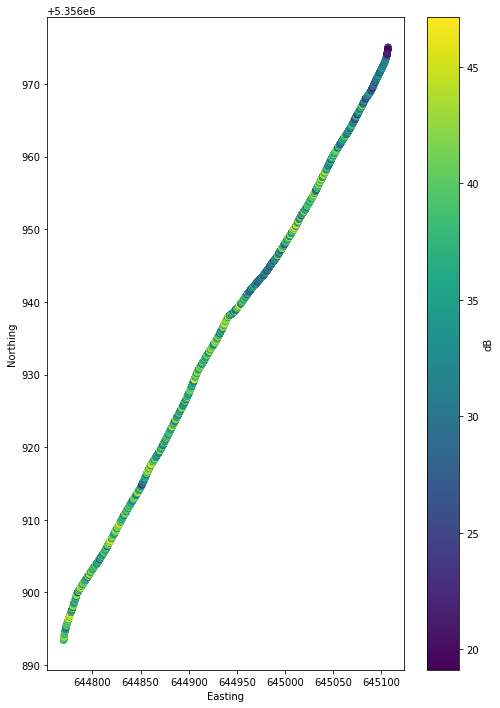

In [11]:
fig, ax = plot_power(dat, 1)
plt.show()

In [ ]:
##To do:
- needs more discussion about what picking is (digitizing reflectors)
- discussion of what this method is and does
- need to make it so that this reflects what is currently in impdar